In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from pathlib import Path    # for saving purpose

In [2]:
train_dir = './dataset/train'
val_dir = './dataset/val'
test_dir = './dataset/test'

BATCH_SIZE = 256
IMG_SIZE = (256, 256)
IMG_SHAPE = IMG_SIZE + (3,)
N_CLASSES = 40

#train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

#train_dataset = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,class_mode='sparse')
val_dataset = val_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='sparse')
test_dataset = test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='sparse')

Found 2771 images belonging to 40 classes.
Found 8341 images belonging to 40 classes.


In [7]:
model = models.load_model('./Final_model/LR0.01_FT82_SGDM_04Dp_40epo.h5')
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf_op_layer_truediv_8 (Tenso (None, 256, 256, 3)       0         
_________________________________________________________________
tf_op_layer_sub_8 (TensorFlo (None, 256, 256, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_8 ( (None, 1280)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 320)               4099

In [6]:
model.evaluate(test_dataset)

  ...
    to  
  ['...']
33/33 [==============================] - 14s 414ms/step - loss: 0.5942 - accuracy: 0.8663


[0.5942289341579784, 0.866323]

In [8]:
def predict_on_batch(model, val_batch, length=32):
    image_batch, label_batch = val_batch[0][:length], tf.dtypes.cast(val_batch[1][:length], tf.int8).numpy()

    softmax_predictions = tf.nn.softmax(model.predict_on_batch(image_batch))[:length]
    softmax_predictions = np.round(softmax_predictions.numpy(), 5)

    top_1_predictions = []
    top_5_predictions = []
    for prediction in softmax_predictions:
        tp5_labels = np.argsort(prediction)[-5:]
        top_1_predictions.append(tp5_labels[-1])

        tp5_softmax_values = np.sort(prediction)[-5:]
        top_5_predictions.append([tp5_labels[::-1], tp5_softmax_values[::-1]])
    
    rows = [1, 2, 3, 4, 5]
    plt.figure(figsize=(24, 20))
    for i in range(length):
        plt.subplot(4, 8, i+1)
        plt.axis('off')
        plt.title(label_batch[i])

        cell_text = []

        for j in range(5):
            cell_text.append([top_5_predictions[i][0][j], top_5_predictions[i][1][j]])

        table = plt.table(cellText=cell_text, rowLabels=rows)
        table.set_fontsize(14)
        table.scale(1, 2)
        plt.imshow(image_batch[i].astype('uint8'))
    plt.savefig('./FT_result/' + 'with_labels.png')

    print('top 1 prediction:')
    print('prediction: \n', top_1_predictions)
    print('label: \n', label_batch)
  
    #print('top 5 prediction:')
    #for i, j in zip(top_5_predictions, label_batch):
        #print('predictions: ', i, ' label: ', j)

top 1 prediction:
prediction: 
 [36, 13, 6, 7, 18, 30, 0, 32, 13, 28, 22, 11, 32, 24, 11, 35, 39, 23, 38, 12, 15, 36, 35, 36, 25, 29, 7, 3, 28, 16, 16, 21]
label: 
 [36 13  6  7 18 30  0 32 21 28 22 11 32 24 11 35 39 23 38 12  0 36 35 36
 25 29  7  3 28 16 16  4]


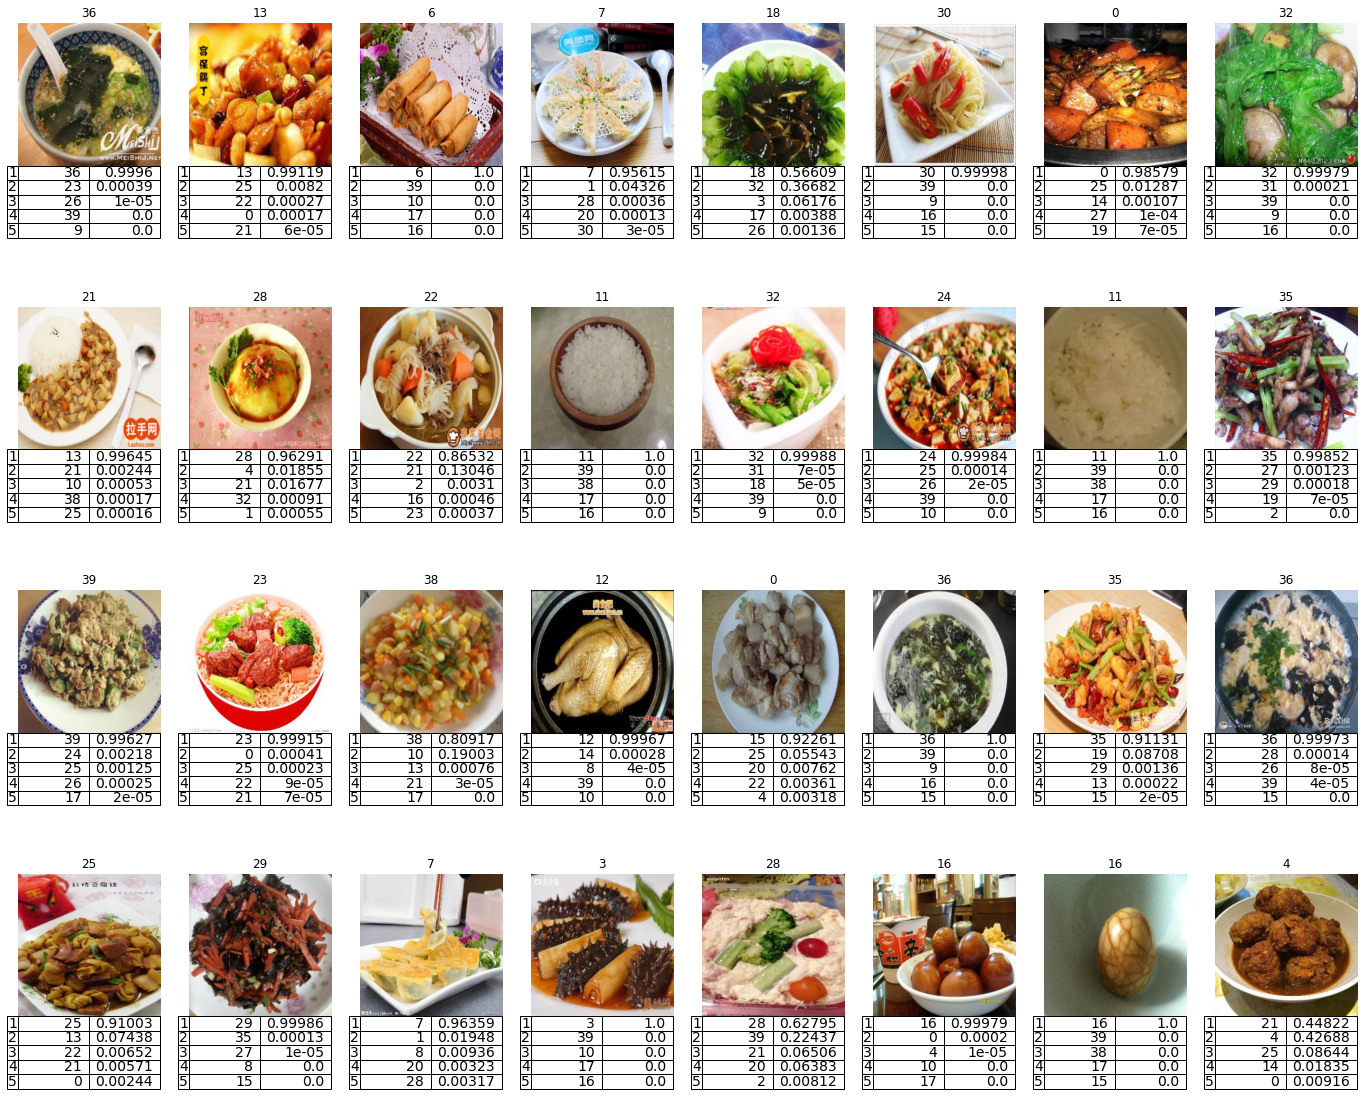

In [9]:
predict_on_batch(model, test_dataset[4])